<a href="https://colab.research.google.com/github/micarrascal/ProyectoBI_final/blob/main/Proyecto_BI_Etapa_1_datos__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

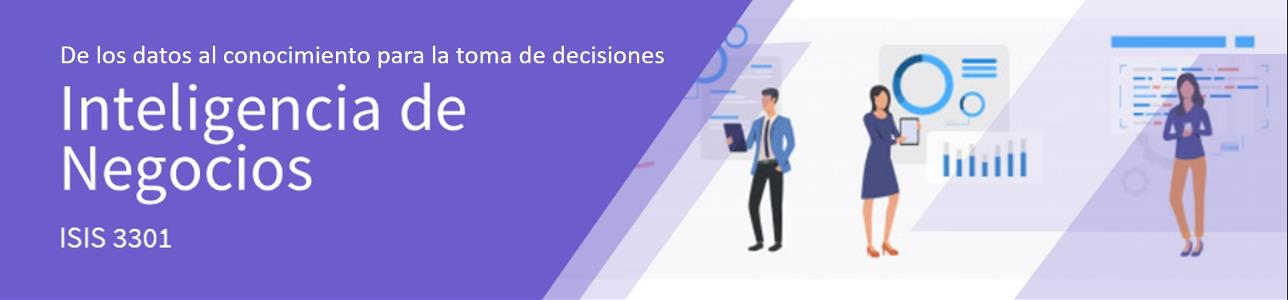

## PROYECTO ETAPA 1 BI
*   Luimarco Carrascal
*   Isabel Carrascal


## Problema
<p style="text-align: justify;"> La Organización de las Naciones Unidas (ONU) adopta, el 25 de septiembre del año 2015, la
Agenda 2030i para el desarrollo sostenible, cuyo fin es reducir la pobreza, garantizar acceso
a la salud y educación, buscar igualdad de género y oportunidades, disminuir el impacto
ambiental, entre otros. Esta agenda se basa en 17 objetivos de desarrollo sostenibleii (ODS)
y 169 metas (derivadas de los diferentes ODS).
Dentro del trabajo en conjunto de diferentes entes para alcanzar el cumplimiento de los
ODS, muchas entidades tienen como enfoque el seguimiento y la evaluación de las políticas
públicas y su impacto a nivel social. Este es el caso del Fondo de Poblaciones de las Naciones
Unidas (UNFPAiii) que, junto con entidades públicas y haciendo uso de diferentes
herramientas de participación ciudadana, busca identificar problemas y evaluar soluciones
actuales, relacionando la información con los diferentes ODS. En este contexto, uno de los
procesos que requiere de un mayor esfuerzo es la clasificación de la información textual
que es recopilada, ya que es una tarea que consume gran cantidad recursos y para la cual
se requiere un experto. Es por esto que, en los últimos años, UNFPA ha venido trabajando,
en conjunto con la Universidad de los Andes, en la implementación de diferentes estrategias
de clasificación de textos, que les permitan hacer un análisis automatizado de opiniones
que representan la voz de los habitantes locales sobre problemáticas de su entorno
particular.
Para apoyar a UNFPA en este proceso se ha planteado el primer proyecto del curso, cuyo
objetivo es desarrollar un modelo de clasificación, con técnicas de aprendizaje
automático, que permita relacionar de manera automática un texto según los ODS. Al
igual que desarrollar una aplicación que facilite la interacción con el resultado de dicho
modelo. El modelo podrá ser utilizado entonces para la interpretación y análisis de la
información textual que es recopilada a través de diferentes fuentes por UNFPA en procesos
de planeación participativa para el desarrollo a nivel territorial.

### 1. Instalación e importanción de librerías.


In [ ]:
!pip install contractions
!pip install --upgrade pip
!pip install ydata-profiling

!pip install num2words
!pip install gensim



In [ ]:
!python -m spacy download es_core_news_sm

2023-10-15 19:01:41.036331: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-15 19:01:43.057890: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 55.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
!pip install --upgrade typeguard typing-extensions


In [ ]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup
#from ydata_profiling import ProfileReport

import gensim
from gensim.models import Word2Vec
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 97.4 MB/s eta 0:00:00


In [ ]:
 # librería para manejar las flexiones gramaticales en el idioma inglés.
!pip install inflect


In [ ]:
# librería Natural Language Toolkit, usada para trabajar con textos
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')

In [ ]:
# Descarga todas las palabras vacias, es decir, aquellas que no aportan nada al significado del texto
nltk.download('stopwords')

In [ ]:
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
nltk.download('wordnet')

In [ ]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
#from sklearn.metrics import classification_report, confusion_matrix, plot_precision_recall_curve
from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt


### 2. Perfilamiento y entendimiento de los datos



#### Lectura de los datos.

In [ ]:
# Monta Google Drive en el entorno de Colab
from google.colab import drive
drive.mount('/content/drive')



### Datos etiquetados

In [ ]:
# Ruta del archivo CSV específico
file_path = '/content/drive/MyDrive/ProyectoBI/Data/cat_6716.csv'

# Leer el archivo CSV
df_textos = pd.read_csv(file_path, delimiter=';')



In [ ]:
df_textos.shape

In [ ]:
df_textos.head

### Datos sin etiquetas

In [ ]:
# Ruta del archivo CSV específico
file_path = '/content/drive/MyDrive/ProyectoBI/Data/SinEtiquetatest_cat_6716.csv'

# Leer el archivo CSV
df_sinEtiqueta = pd.read_csv(file_path, delimiter=';')


In [ ]:
df_sinEtiqueta.shape

(980, 2)

In [ ]:
df_sinEtiqueta.head

<bound method NDFrame.head of                                         Textos_espanol  sdg
0    1. 1. Introducción: Las Estructuras del Derech...  NaN
1    Las aguas subterráneas se han debatido en el c...  NaN
2    La presente contribución evalúa la jurispruden...  NaN
3    Sin embargo, este crédito fiscal expira en 201...  NaN
4    Este estudio explora las actitudes, comportami...  NaN
..                                                 ...  ...
975  Este artículo explora la historia y el impacto...  NaN
976  Mientras que algunos dan mayor énfasis a la ma...  NaN
977  Una innovación importante para garantizar el s...  NaN
978  El Salvador continúa luchando con niveles elev...  NaN
979  También puede reflejar una baja conciencia sob...  NaN

[980 rows x 2 columns]>

#### Entendimiento de los Datos

Para entender los mensajes, se realizan 'estadísticas descriptivas' para poder obtener un análisis de los textos.

In [ ]:
textos = df_textos.copy()
textos['Conteo'] = [len(x) for x in textos['Textos_espanol']]
textos['Moda'] = [max(set(x.split(' ')), key = x.split(' ').count) for x in textos['Textos_espanol']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]

# Se realiza un perfilamiento de los datos con la libre pandas profiling
#ProfileReport(textos)

### 3. Preparación de datos

Para poder realizar el pre-procesamiento de los datos, es recomendable pasar por tres etapas:
* Limpieza de los datos.
* Tokenización.
* Normalización.

Para mayor información, pueden consultar el [siguiente artículo](https://medium.com/datos-y-ciencia/preprocesamiento-de-datos-de-texto-un-tutorial-en-python-5db5620f1767
).

#### **3.1 Limpieza de los datos**


**Pipeline**



In [ ]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import nltk



# Crear una copia del DataFrame originaletiquetas y sin etiquetas
textos_df = textos.copy()
df_sinEtiquetaT= df_sinEtiqueta.copy()

def limpiar_y_tokenizar(texto):
    texto = BeautifulSoup(texto, "lxml").text  # Eliminar etiquetas HTML/XML
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar caracteres especiales
    texto = texto.lower()  # Convertir a minúsculas
    tokens = nltk.word_tokenize(texto)  # Tokenización
    stop_words = set(nltk.corpus.stopwords.words('spanish'))  # Definir las stopwords
    tokens_filtrados = [word for word in tokens if word not in stop_words]  # Eliminar stopwords
    tokens_unicos = list(set(tokens_filtrados))  # Eliminar tokens repetidos
    texto_limpio_tokenizado = ' '.join(tokens_unicos)  # Unir los tokens en una cadena
    return texto_limpio_tokenizado


# Aplicar la función de limpieza y tokenización a cada fila de la columna de texto
textos_df['Textos_espanol'] = textos_df['Textos_espanol'].apply(limpiar_y_tokenizar)





In [ ]:
textos_df.head

In [ ]:
#Limpieza datos sin etiquetar
df_sinEtiquetaT= df_sinEtiqueta.copy()

# Aplicar la función de limpieza y tokenización a cada fila de la columna de texto
df_sinEtiquetaT['Textos_espanol'] = df_sinEtiquetaT['Textos_espanol'].apply(limpiar_y_tokenizar)

In [ ]:
df_sinEtiquetaT.head

<bound method NDFrame.head of                                         Textos_espanol  sdg
0    delincuencia seguridad eutanasia penal cambio ...  NaN
1    climático nivel tarificación cambio 2013e agua...  NaN
2    procedimiento relativas miembro presente papel...  NaN
3    renovables 000 anualmente expira ofrecer co2 g...  NaN
4    diseñó positivamente prueba poner todas norma ...  NaN
..                                                 ...  ...
975  siglos gobierno además después artículo genera...  NaN
976  si sistema intencionado énfasis sólo ven energ...  NaN
977  certificado reino competencia fomentar costos ...  NaN
978  salvador seguridad dentro narcotraficantes cas...  NaN
979  papel diferentes si sistema reflejar positivam...  NaN

[980 rows x 2 columns]>

In [ ]:
class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_cleaned = X.apply(self.clean_text)
        return X_cleaned

    def clean_text(self, text):
        text = re.sub(r'[^\w\s]', '', text)  # Eliminar caracteres especiales
        text = text.lower()  # Convertir a minúsculas
        stop_words = set(stopwords.words('spanish'))  # Definir las stopwords
        text = ' '.join(word for word in text.split() if word not in stop_words)  # Eliminar stopwords
        text = ' '.join(set(text.split()))  # Eliminar palabras repetidas
        return text



In [ ]:
pipeline = Pipeline([
    ('text_cleaner', TextCleaner()),
    ('vectorizer', CountVectorizer())
])

In [589]:
#aplicar el pipeline
#X_clean = pipeline.fit_transform(textos_df['Textos_espanol'])
#X_clean = pipeline.fit_transform(df_sinEtiquetaT['Textos_espanol'])


In [ ]:
textos_df.head

In [586]:
import re
import unicodedata
from num2words import num2words

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all integer occurrences in list of tokenized words with textual representation"""
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = num2words(word, lang='es')  # español
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def preprocessing(text):
    words = nltk.word_tokenize(text)  # Tokenizar el texto aquí
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    return ' '.join(words)




#### **3.2 Tokenización**
La tokenización permite dividir frases u oraciones en palabras. Con el fin de desglozar las palabras correctamente para el posterior análisis. Pero primero, se realiza una corrección de las contracciones que pueden estar presentes en los textos.

In [ ]:
df_textos.head

In [ ]:
df_textos.dtypes

In [ ]:
textos_df['Textos_espanol'] = textos_df['Textos_espanol'].apply(preprocessing)  # Aplica la eliminación del ruido
textos_df.head()


In [587]:
df_sinEtiquetaT['Textos_espanol'] = df_sinEtiquetaT['Textos_espanol'].apply(preprocessing)  # Aplica la eliminación del ruido
df_sinEtiquetaT.head()

,Textos_espanol,sdg
0,delincuenc seguridad eutanas pen cambio estand...,NaN
1,climatico nivel tarificac cambio 2013e agua ne...,NaN
2,procedimiento relativa miembro pres papel acto...,NaN
3,renov cero an expir ofrec co2 generacia3n emba...,NaN
4,diseno positiva prueb pon toda norm gr acceso ...,NaN


#### **3.3. Normalización**
En la normalización de los datos se realiza la eliminación de prefijos y sufijos, además de realizar una lemmatización.

In [588]:
import spacy
from nltk.stem.snowball import SnowballStemmer
import pandas as pd

# Asegúrate de tener el modelo de spaCy para español descargado
nlp = spacy.load("es_core_news_sm")

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = SnowballStemmer(language='spanish')
    stems = [stemmer.stem(word) for word in words]
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    doc = nlp(" ".join(words))
    lemmas = [token.lemma_ for token in doc]
    return lemmas

def stem_and_lemmatize(text):
    words = text.split()  # Asume que el texto ya está tokenizado y separado por espacios
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return ' '.join(stems + lemmas)  # Unir stems y lemmas en una cadena


textos_df['Textos_espanol'] = textos_df['Textos_espanol'].apply(stem_and_lemmatize)  # Aplica lematización y derivación
textos_df.head()


AttributeError: ignored

In [ ]:


df_sinEtiquetaT['Textos_espanol'] = df_sinEtiquetaT['Textos_espanol'].apply(stem_and_lemmatize)  # Aplica lematización y derivación
df_sinEtiquetaT.head()

,Textos_espanol,sdg
0,delincuenc seguridad eutanas pen cambio estand...,NaN
1,climatico nivel tarificac cambio 2013e agua ne...,NaN
2,procedimiento relativa miembro pres papel acto...,NaN
3,renov cero an expir ofrec co2 generacia3n emba...,NaN
4,diseno positiva prueb pon toda norm gr acceso ...,NaN


In [ ]:
textos_df.head

In [ ]:
df_sinEtiquetaT.head

<bound method NDFrame.head of                                         Textos_espanol  sdg
0    delincuenc seguridad eutanas pen cambio estand...  NaN
1    climatico nivel tarificac cambio 2013e agua ne...  NaN
2    procedimiento relativa miembro pres papel acto...  NaN
3    renov cero an expir ofrec co2 generacia3n emba...  NaN
4    diseno positiva prueb pon toda norm gr acceso ...  NaN
..                                                 ...  ...
975  siglo gobierno adema despu articulo gen politi...  NaN
976  si sistem intencionado enfas solo ven energeti...  NaN
977  certificado reino competenc foment costo tecno...  NaN
978  salvad seguridad dentro narcotraf cas miembro ...  NaN
979  papel dif si sistem reflej positiva centro man...  NaN

[980 rows x 2 columns]>

In [ ]:
textos_df


In [ ]:
textos_df.head


In [ ]:
textos_df

In [ ]:
textos_df.head


 **3.4 Transformación a vectores**

 Modelo Word2vec para vectorizar

In [585]:
from gensim.models import Word2Vec

# Entrenando el modelo Word2Vec
word2vec_model = Word2Vec(sentences=df_sinEtiquetaT['Textos_espanol'], vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.save("word2vecEt.model")

In [ ]:
from gensim.models import Word2Vec

# Entrenando el modelo Word2Vec
word2vec_model = Word2Vec(sentences=textos_df['Textos_espanol'], vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.save("word2vec.model")


In [ ]:
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv.index_to_key]
    return np.mean(word2vec_model.wv[doc], axis=0)

# Aplicando la función a cada documento
textos_df['doc_vector'] = textos_df['Textos_espanol'].apply(lambda doc: document_vector(word2vec_model, doc))


In [ ]:
# Aplicando la función a cada documento
df_sinEtiquetaT['doc_vector'] = df_sinEtiquetaT['Textos_espanol'].apply(lambda doc: document_vector(word2vec_model, doc))

In [ ]:
from sklearn.model_selection import train_test_split

X = np.array(textos_df['doc_vector'].tolist())
y = textos_df['sdg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4. Creación y Aplicación del modelo

Algoritmos:

* Random Forest
* Naive Bayes

### Random Forest





### Busqueda de hiperparametros optimos para randomforest
Sin embargo, no se uso GridSearch por su alto tiempo de ejecución

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
#
# # Crear el modelo
# rf = RandomForestClassifier(random_state=42)
#
# # Definir la grilla de hiperparámetros
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [10, 20, 30, 40, 50, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt']
# }
#
# # Crear el objeto GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
#
# # Ajustar el modelo a los datos
# grid_search.fit(X_train, y_train)
#
# # Obtener los mejores hiperparámetros encontrados
# print(grid_search.best_params_)



Implementación de RandomForest con los parametros por default

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           6       0.83      0.77      0.80       217
           7       0.73      0.73      0.73       197
          16       0.76      0.82      0.79       186

    accuracy                           0.77       600
   macro avg       0.77      0.77      0.77       600
weighted avg       0.78      0.77      0.77       600



      precision    recall  f1-score   support

           6       0.83      0.77      0.80       217
           7       0.73      0.73      0.73       197
          16       0.76      0.82      0.79       186

    accuracy                           0.77       600
   macro avg       0.77      0.77      0.77       600
weighted avg       0.78      0.77      0.77       600

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Crear el modelo con los hiperparámetros óptimos
rf_optimizado = RandomForestClassifier(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='auto',
    max_depth=None,
    random_state=42
)

# Ajustar el modelo a los datos de entrenamiento
rf_optimizado.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = rf_optimizado.predict(X_test)

# Calcular e imprimir las métricas de desempeño
reporte = classification_report(y_test, y_pred)
print(reporte)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           6       0.84      0.77      0.80       217
           7       0.73      0.75      0.74       197
          16       0.77      0.82      0.79       186

    accuracy                           0.78       600
   macro avg       0.78      0.78      0.78       600
weighted avg       0.78      0.78      0.78       600



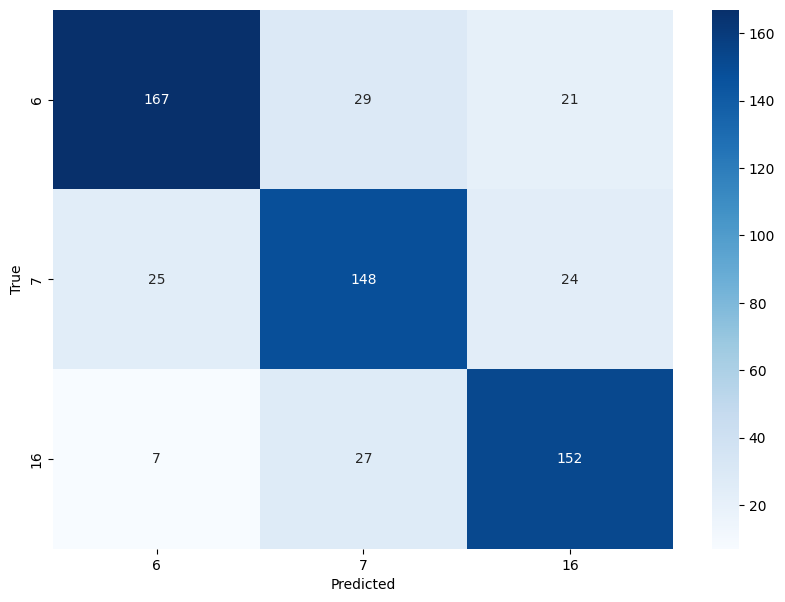

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred = rf_optimizado.predict(X_test)

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[6, 7, 16], yticklabels=[6, 7, 16])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



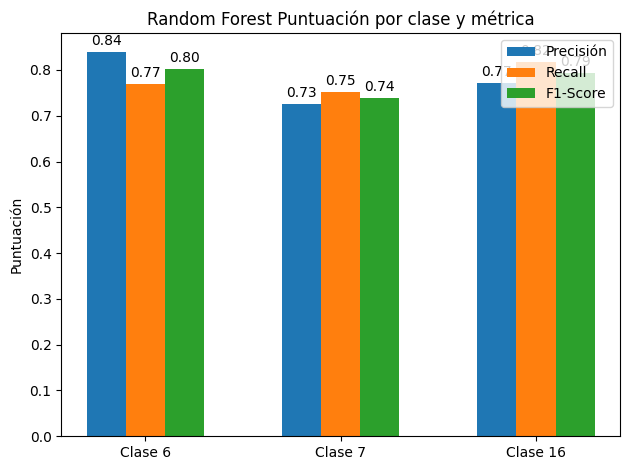

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

y_pred = rf_optimizado.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Extraer las métricas del reporte
precision = [report[str(i)]['precision'] for i in [6, 7, 16]]
recall = [report[str(i)]['recall'] for i in [6, 7, 16]]
f1_score = [report[str(i)]['f1-score'] for i in [6, 7, 16]]
labels = ['Clase 6', 'Clase 7', 'Clase 16']

# Crear el gráfico
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precisión')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Añadir etiquetas, título y leyenda
ax.set_ylabel('Puntuación')
ax.set_title('Random Forest Puntuación por clase y métrica')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Función para añadir etiquetas sobre las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()


## Naive Bayes:

Implementación: Luimarco Carrascal


busqueda de hiperparametros optimos

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, f1_score

# Definir el modelo
nb = GaussianNB()

# Definir la grilla de hiperparámetros
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Definir la métrica
f1_scorer = make_scorer(f1_score, average='weighted')

# Crear la búsqueda en grilla
grid_search_nb = GridSearchCV(nb, param_grid_nb, scoring=f1_scorer, cv=5, verbose=1, n_jobs=-1)
grid_search_nb.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print(grid_search_nb.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'var_smoothing': 6.579332246575683e-05}


Mejor hiperparametro:
{'var_smoothing': 6.579332246575683e-05}


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Crear el modelo con el hiperparámetro óptimo
nb_model_optimized = GaussianNB(var_smoothing=6.579332246575683e-05)

# Entrenar el modelo optimizado
nb_model_optimized.fit(X_train, y_train)

# Predecir las etiquetas de los datos de prueba
y_pred_nb_optimized = nb_model_optimized.predict(X_test)

# Evaluar el modelo optimizado
print("Reporte de clasificación para Naive Bayes Optimizado:\n", classification_report(y_test, y_pred_nb_optimized))


Reporte de clasificación para Naive Bayes Optimizado:
               precision    recall  f1-score   support

           6       0.80      0.59      0.68       217
           7       0.72      0.56      0.63       197
          16       0.56      0.88      0.68       186

    accuracy                           0.67       600
   macro avg       0.70      0.67      0.66       600
weighted avg       0.70      0.67      0.66       600



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Crear el modelo
nb_model = GaussianNB()

# Entrenar el modelo
nb_model.fit(X_train, y_train)

# Predecir las etiquetas de los datos de prueba
y_pred_nb = nb_model.predict(X_test)

# Evaluar el modelo
print("Reporte de clasificación para Naive Bayes:\n", classification_report(y_test, y_pred_nb))



Reporte de clasificación para Naive Bayes:
               precision    recall  f1-score   support

           6       0.80      0.59      0.68       217
           7       0.72      0.56      0.63       197
          16       0.56      0.88      0.68       186

    accuracy                           0.67       600
   macro avg       0.70      0.67      0.66       600
weighted avg       0.70      0.67      0.66       600



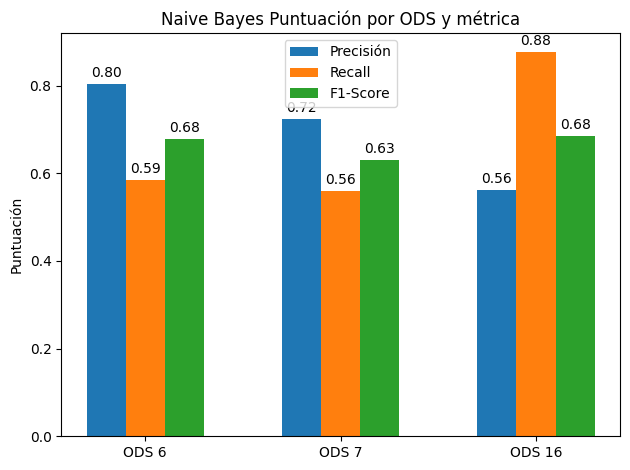

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

y_pred = nb_model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Extraer las métricas del reporte
precision = [report[str(i)]['precision'] for i in [6, 7, 16]]
recall = [report[str(i)]['recall'] for i in [6, 7, 16]]
f1_score = [report[str(i)]['f1-score'] for i in [6, 7, 16]]
labels = ['ODS 6', 'ODS 7', 'ODS 16']

# Crear el gráfico
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precisión')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Añadir etiquetas, título y leyenda
ax.set_ylabel('Puntuación')
ax.set_title('Naive Bayes Puntuación por ODS y métrica')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Función para añadir etiquetas sobre las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

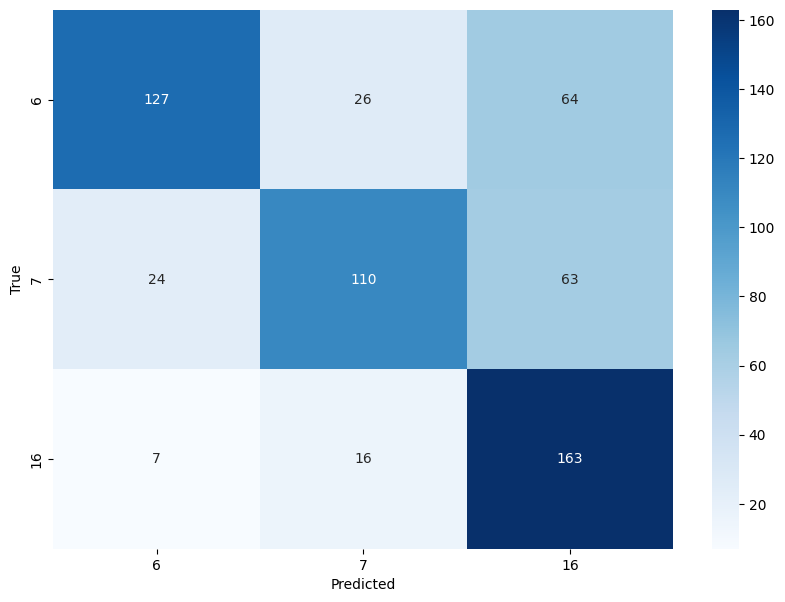

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred = nb_model.predict(X_test)

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[6, 7, 16], yticklabels=[6, 7, 16])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

# Crear el modelo
svm_model = SVC(kernel='linear', random_state=42)

# Entrenar el modelo
svm_model.fit(X_train, y_train)

# Predecir las etiquetas de los datos de prueba
y_pred_svm = svm_model.predict(X_test)

# Evaluar el modelo
print("Reporte de clasificación para SVM:\n", classification_report(y_test, y_pred_svm))


Reporte de clasificación para SVM:
               precision    recall  f1-score   support

           6       0.96      0.91      0.93       217
           7       0.84      0.83      0.83       197
          16       0.83      0.88      0.85       186

    accuracy                           0.88       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.88      0.88      0.88       600



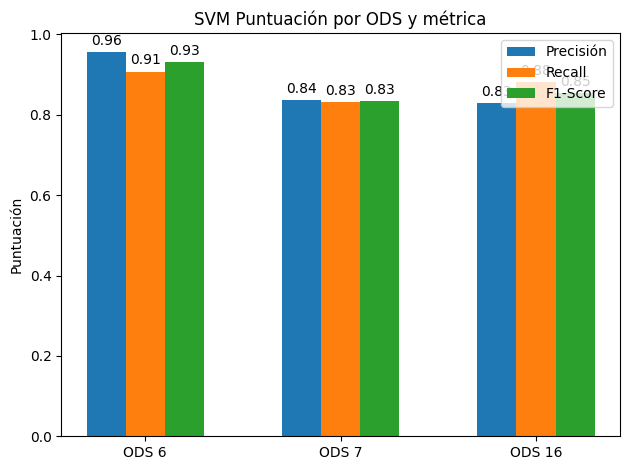

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

y_pred = svm_model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Extraer las métricas del reporte
precision = [report[str(i)]['precision'] for i in [6, 7, 16]]
recall = [report[str(i)]['recall'] for i in [6, 7, 16]]
f1_score = [report[str(i)]['f1-score'] for i in [6, 7, 16]]
labels = ['ODS 6', 'ODS 7', 'ODS 16']

# Crear el gráfico
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precisión')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Añadir etiquetas, título y leyenda
ax.set_ylabel('Puntuación')
ax.set_title('SVM Puntuación por ODS y métrica')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Función para añadir etiquetas sobre las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

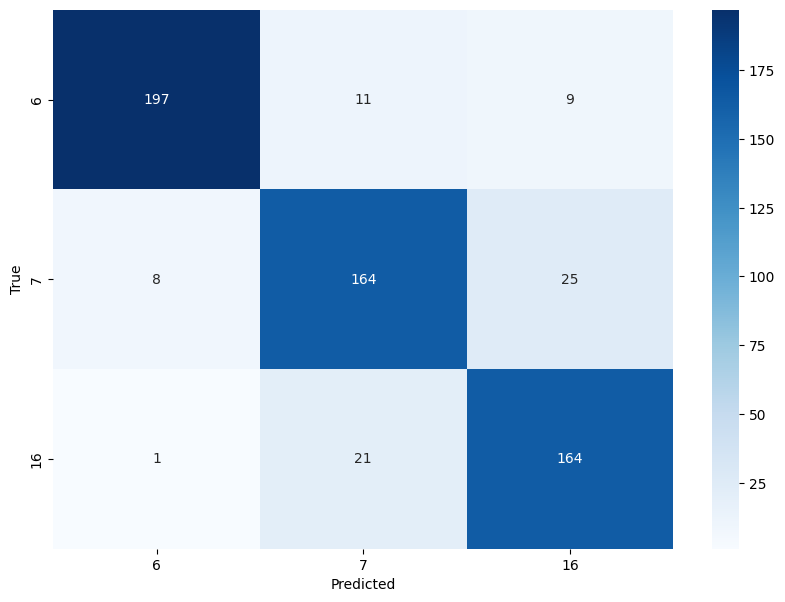

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred = svm_model.predict(X_test)

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[6, 7, 16], yticklabels=[6, 7, 16])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Predicción de los datos Sin etiquetar

In [592]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.semi_supervised import LabelSpreading

# Combina los dos dataframes
combined_df = pd.concat([textos_df, df_sinEtiquetaT], ignore_index=True)

# Convierte los textos a características numéricas (por ejemplo, utilizando TF-IDF)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(combined_df['Textos_espanol'])

# Prepara las etiquetas, usando -1 para los datos no etiquetados
y = combined_df['sdg'].replace(np.nan, -1).astype(int).values


In [ ]:
# Crea una instancia del modelo Label Spreading
label_spread = LabelSpreading(kernel='knn', alpha=0.2)

# Entrena el modelo
label_spread.fit(X, y)

# Las etiquetas predichas estarán en label_spread.transduction_
y_pred = label_spread.transduction_


In [ ]:
# Extrae las etiquetas predichas para los datos no etiquetados
predicted_labels = y_pred[len(textos_df):]

# Añade las etiquetas predichas al dataframe df_sinEtiquetaT
df_sinEtiquetaT['sdg'] = predicted_labels


In [ ]:
df_sinEtiquetaT.shape

In [ ]:
df_sinEtiquetaT.head

In [ ]:
df_sinEtiqueta.head

In [ ]:
df_sinEtiqueta.shape

In [ ]:
df_sinEtiqueta['sdg'] = df_sinEtiquetaT['sdg'].values


Export del archivo de predicciones

In [591]:
df_sinEtiqueta.to_csv('/content/drive/MyDrive/ProyectoBI/Data/SplitSemiEtiquetastest_cat_6716.csv', index=False, sep=';')


[NbConvertApp] Converting notebook /content/drive/MyDrive/ProyectoBI/ Proyecto BI Etapa 1_datos.ipynb to html
[NbConvertApp] Writing 1325973 bytes to /content/drive/MyDrive/ProyectoBI/ Proyecto BI Etapa 1_datos.html
